In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hypercube_to_simplex(x):
    c = np.max(np.abs(x),axis=1) / np.linalg.norm(x, ord=1,axis=1)
    y = c[:,None] * x
    return y

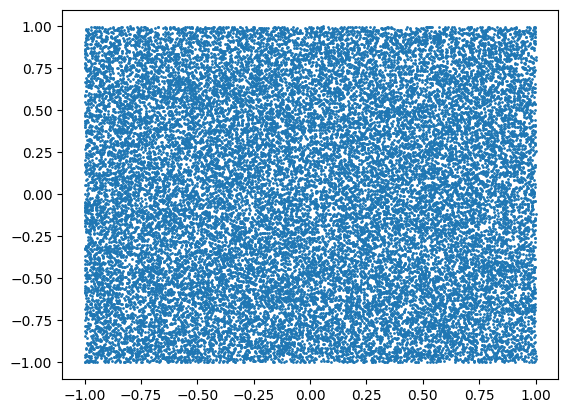

In [6]:
X = np.random.rand(30000,2)*2-1
plt.scatter(X[:,0],X[:,1],s=1)

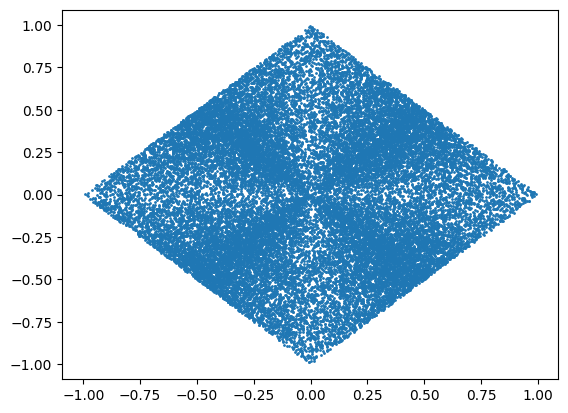

In [9]:
Y = hypercube_to_simplex(X)
plt.figure()
plt.scatter(Y[:,0],Y[:,1],s=1)

In [10]:
def sample_simplex(xi, n_mc=1, on_simplex=False):
    """
    Use an analytical function map to points in the d-dimensional unit hypercube to a
    d-dimensional simplex with nodes xi.

    Parameters
    ----------
    xi: array of floats, shape (d + 1, d)
        The nodes of the d dimensional simplex.

    n_mc : int, The default is 1.
        Number of samples to draw from inside the simplex

    on_simplex: boolean, default is False
        If True, sample on the simplex rather than inside it

    Returns: array, shape (n_mc, d)
    -------
    n_mc uniformly distributed points inside the d-dimensional simplex with edges xi.

    """
    d = xi.shape[1]
    P = np.zeros([n_mc, d])
    for k in range(n_mc):
        # random points inside the unit hypercube
        r = np.random.rand(d)
        # sample on, instead of inside the simplex (all samples will sum to one)
        if on_simplex:
            r[-1] = 1

        # the term of the map is \xi_k_j0
        sample = np.copy(xi[0])
        for i in range(1, d + 1):
            prod_r = 1.
            # compute the product of r-terms: prod(r_{d-j+1}^{1/(d-j+1)})
            for j in range(1, i + 1):
                prod_r *= r[d - j]**(1. / (d - j + 1))
            # compute the ith term of the sum: prod_r*(\xi_i-\xi_{i-1})
            sample += prod_r * (xi[i] - xi[i - 1])
        P[k, :] = sample

    return P


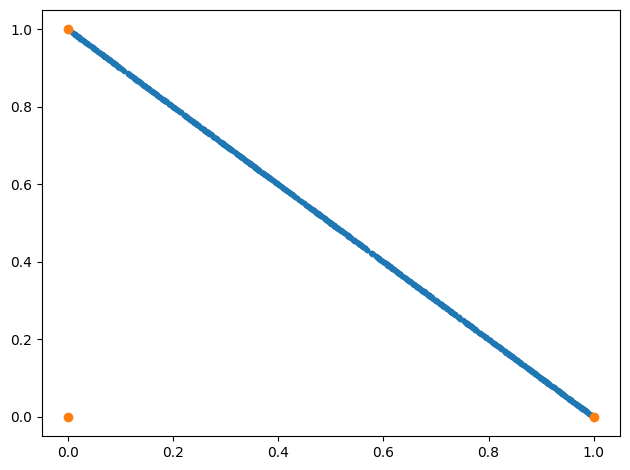

In [12]:
# triangle points
xi = np.array([[0.0, 0.0], [1.0, 0.0], [0, 1]])
samples = sample_simplex(xi, 1000, on_simplex=True)
fig = plt.figure()
ax = fig.add_subplot(111)
# plot random samples
ax.plot(samples[:,0], samples[:, 1], '.')
# plot edges
ax.plot(xi[:, 0], xi[:, 1], 'o')
plt.tight_layout()


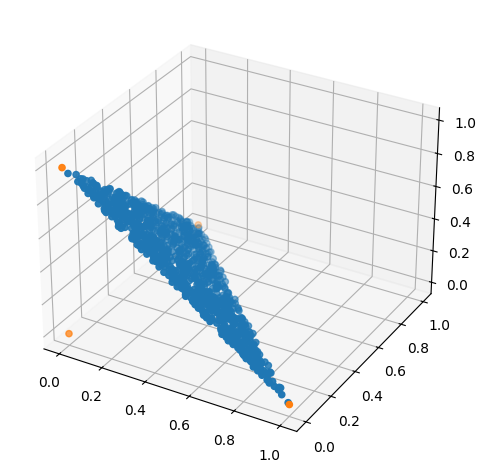

In [13]:

# 3D simplex
xi = np.array([[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0, 1, 0], [0,0,1]])
samples = sample_simplex(xi, 1000, on_simplex=True)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot random samples
ax.scatter(samples[:,0], samples[:, 1], samples[:,2], '.')
# plot edges
ax.scatter(xi[:, 0], xi[:, 1], xi[:, 2], 'o')
plt.tight_layout()


In [14]:
# 4D simplex
xi = np.array([[0,0,0,0], [1.0, 0.0, 0.0, 0], [0, 1, 0, 0], [0,0,1,0], [0,0,0,1]])
samples = sample_simplex(xi, 1000, on_simplex=True)
# These should all sum to one
print(np.sum(samples, axis=1))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [15]:
# 100D simplex
xi = np.zeros([1, 100])
xi = np.append(xi, np.eye(100), axis=0)
samples = sample_simplex(xi, 1000, on_simplex=True)
# These should all sum to one
print(np.sum(samples, axis=1))

plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

# References

- [ ] [](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)
- [ ] [Finding a mapping from the hypercube to a convex hull that conserves the uniform distribution](https://math.stackexchange.com/questions/4773528/finding-a-mapping-from-the-hypercube-to-a-convex-hull-that-conserves-the-uniform)